In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 16 20:52:40 2019

@author: natasha
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

dataset=pd.read_csv("Telco-Churn.csv")
dataset_copy=pd.read_csv("Telco-Churn.csv")
#dataset.info()
#Convert total charges to a numeric value

In [2]:
dataset_copy['TotalCharges']=pd.to_numeric(dataset_copy['TotalCharges'],errors='coerce')
#we have 11 missing values in the total charges column now, in the total charges column.
#Also on inspection it was found that they had a tenure of 0. This data is not really useful to us, since their total charges are not available to us, and the tenure itself is 0.
#Dropping all null values
dataset_copy.dropna(how='any',inplace=True)
numerical_cols=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
categorical_cols=[ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
#DataVisualization
#sns.boxplot(x='Churn',y='MonthlyCharges',data=dataset_copy)
#sns.boxplot(x='MonthlyCharges',data=dataset_copy)
#sns.boxplot(x='Churn',y='TotalCharges',data=dataset_copy)

data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
data_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']


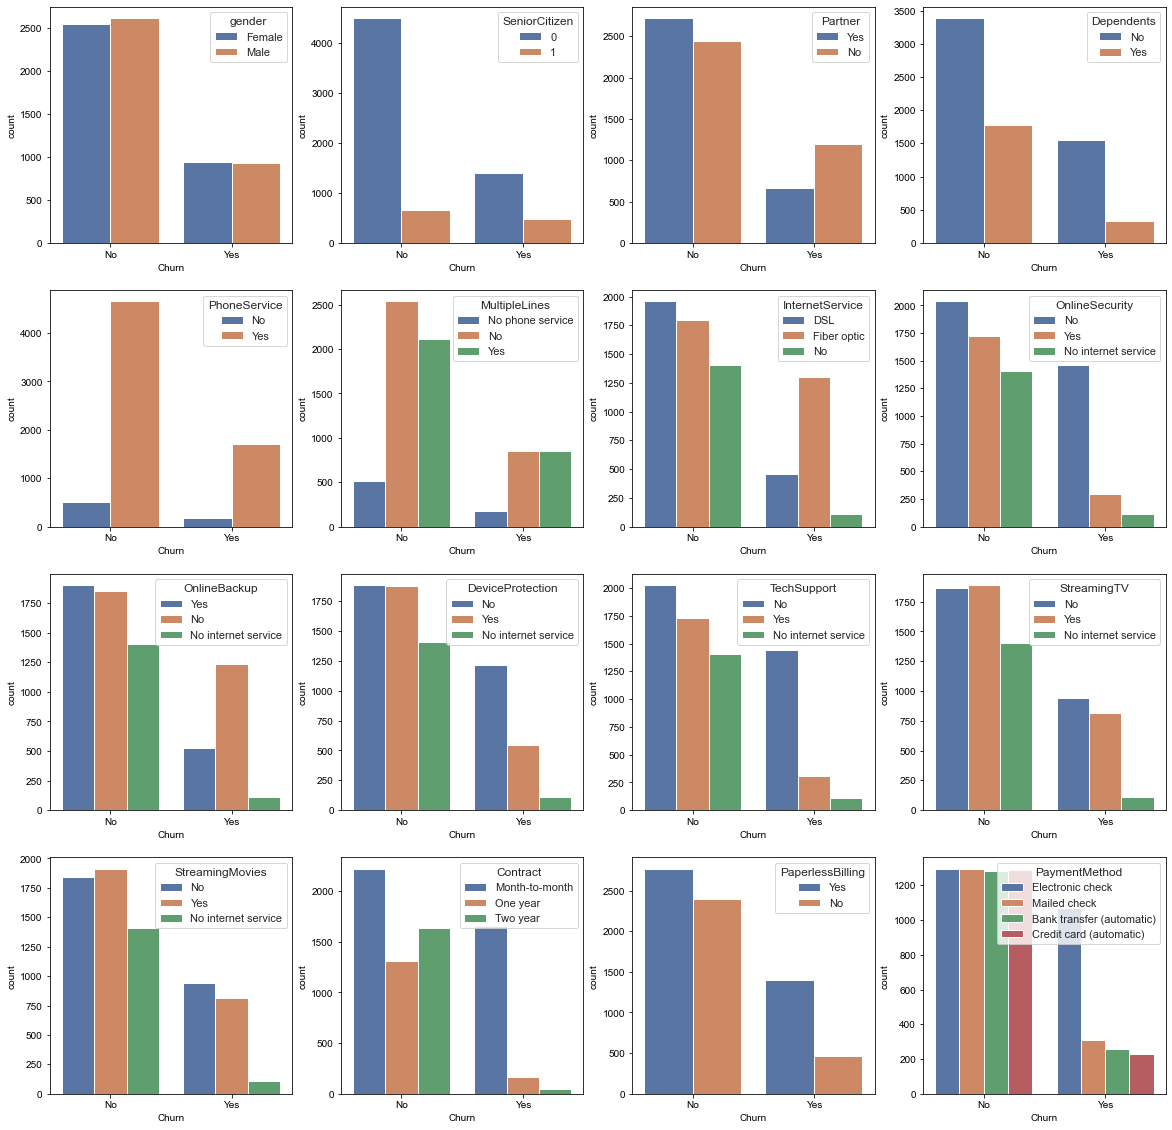

In [3]:
#visualization code from https://github.com/MET4LHE4D/Telco-Customer-Churn-Prediction-Using-ANN/blob/master/CustomerChurnPrediction.ipynb

fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=dataset_copy["Churn"],hue=dataset_copy[col],ax=axis)
dataset_copy=dataset_copy.drop('customerID',axis=1)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in data_cat:
    dataset_copy.loc[:,cols] = LabelEncoder().fit_transform(dataset_copy.loc[:,cols])

In [4]:
onehotencoder = OneHotEncoder(sparse=False)
data_categorical = onehotencoder.fit_transform(dataset_copy[data_cat])
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler()
data_numeric=standard_scaler.fit_transform(dataset_copy[data_cont])


In [5]:
features=np.concatenate([data_categorical,data_numeric],axis=1)
target=dataset_copy.iloc[:,19:].values
target=label_encoder.fit_transform(target)



D:\Personal\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
dataset_copy[data_cat].head().T

,0,1,2,3,4
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
PhoneService,0,1,1,0,1
MultipleLines,1,0,0,1,0
InternetService,0,0,0,0,1
OnlineSecurity,0,2,2,2,0
OnlineBackup,2,0,2,0,0
DeviceProtection,0,2,0,2,0


In [23]:
dataset_copy[data_cont].head().T

,0,1,2,3,4
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65


In [6]:
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)


y_pred=classifier.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix


array([[933, 105],
       [167, 202]], dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
#followed a random method for setting the output dim (num of input variables + no of final output variables(one here since its a binary classification,divided by two))
#classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=44))
#classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
#classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

classifier.add(Dense(units = 6, input_dim = np.shape(X_train)[1], kernel_initializer = 'uniform', activation = 'relu')) 
# Second HL
classifier.add(Dense(units = 8, input_dim = 12, kernel_initializer = 'uniform', activation = 'relu'))
# Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'sigmoid')) 
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
#classifier.add(Dense(units=6,input_dim=46,output_dim=10,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=10,init='uniform',activation='relu'))
#classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=10,epochs=100)
y_pred_neural=classifier.predict(X_test)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.5991 - accuracy: 0.7425
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4246 - accuracy: 0.7954
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8010
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4298 - accuracy: 0.7954
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8023
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8061
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8004
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4308 - accuracy: 0.7918
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.7948
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4217 - accura

563/563 [==============================] - 1s 2ms/step - loss: 0.4195 - accuracy: 0.7979
Epoch 82/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8136
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3959 - accuracy: 0.8229
Epoch 84/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3888 - accuracy: 0.8224
Epoch 85/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8135
Epoch 86/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8108
Epoch 87/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4035 - accuracy: 0.8085
Epoch 88/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3954 - accuracy: 0.8180
Epoch 89/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8072
Epoch 90/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4068 - accuracy: 

In [10]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = classifier.predict(X_test)
y_pred = np.round(y_pred)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[954  84]
 [193 176]]


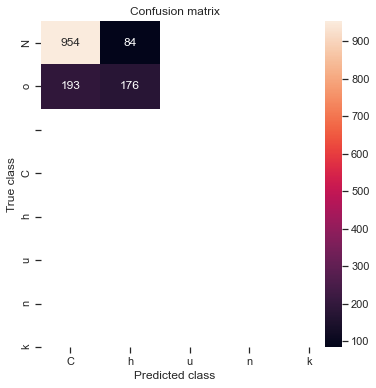

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1038
           1       0.68      0.48      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [14]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels="Chunk", yticklabels="No Chunk", annot=True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, y_pred))